In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2
%matplotlib inline

In [89]:
getim = lambda x: cv2.imread('../data/bair/traj_0_to_255/5/%d.png'%x)


## Features to track

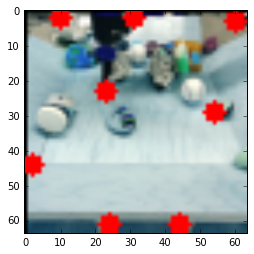

(<matplotlib.image.AxesImage at 0x110c35d10>, None)

In [79]:
im0 = getim(0)
gray = cv2.cvtColor(im0, cv2.COLOR_RGB2GRAY)
corners = cv2.goodFeaturesToTrack(gray,25,0.05,20)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(im0,(x,y),3,255,-1)

plt.imshow(im0),plt.show()


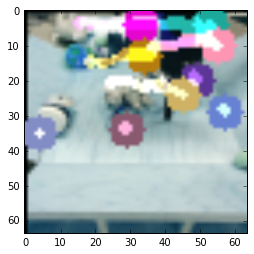

In [47]:
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0,255,(100,3))
# Take first frame and find corners in it
old_frame = getim(0)
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
for i in range(1, 30):
    frame = getim(i)
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)
    plt.imshow(img)
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)


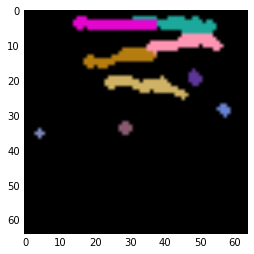

In [48]:
plt.imshow(mask)

In [50]:
mask.shape

(64, 64, 3)

## Motion tracking by Countours

In [63]:
im0 = getim(0)
gray0 = cv2.cvtColor(im0, cv2.COLOR_RGB2GRAY)
gray0 = cv2.GaussianBlur(gray0, (7, 7), 0)

In [64]:
im3 = getim(9)
gray3 = cv2.cvtColor(im3, cv2.COLOR_RGB2GRAY)
gray3 = cv2.GaussianBlur(gray3, (7, 7), 0)

In [53]:
#(cnts, _) = cv2.findContours(gray0.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [65]:
frameDelta = cv2.absdiff(gray0, gray3)
thresh = cv2.threshold(frameDelta, 25, 255, cv2.THRESH_BINARY)[1]
(cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [74]:
for c in cnts:
    print(cv2.contourArea(c))
    #if cv2.contourArea(c) < 200:
    (x, y, w, h) = cv2.boundingRect(c)
    print(x, y, w, h)
    cv2.rectangle(im3, (x, y), (x + w, y + h), (0, 255, 0), 2)

0.5
(40, 15, 2, 2)
84.5
(37, 1, 12, 12)


In [70]:
cv2.imwrite('a.png', thresh)
cv2.imwrite('aa.png', im0)
cv2.imwrite('aaa.png', getim(9))
cv2.imwrite('aaaa.png', im3)

True

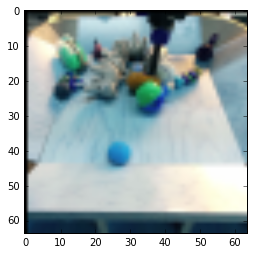

In [74]:
im = getim(1)
plt.imshow(im)

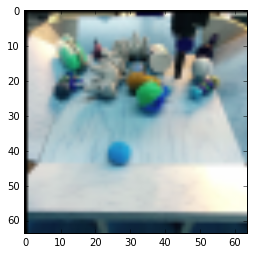

In [75]:
im1 = getim(2)
plt.imshow(im1)

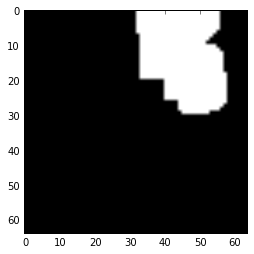

In [86]:
k=3
i = cv2.GaussianBlur(cv2.cvtColor(im, cv2.COLOR_RGB2GRAY), (k, k), 0)
ii = cv2.GaussianBlur(cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY), (k, k), 0)
frameDelta = cv2.absdiff(i, ii)
thresh = cv2.threshold(frameDelta, 70, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.dilate(thresh, None, iterations=3)
plt.imshow(thresh, cmap='gray')

In [93]:
ksize = 3
im0 = getim(0)
gray0 = cv2.cvtColor(im0, cv2.COLOR_RGB2GRAY)
gray0 = cv2.GaussianBlur(gray0, (ksize, ksize), 0)

cv2.imwrite('0.png', im0)
for i in range(1, 15):
    im = getim(i)
    g = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    g = cv2.GaussianBlur(g, (ksize, ksize), 0)
    frameDelta = cv2.absdiff(gray0, g)
    thresh = cv2.threshold(frameDelta, 70, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.dilate(thresh, None, iterations=3)
    (cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for c in cnts:
        print(cv2.contourArea(c))
#         if cv2.contourArea(c) < 100:

        (x, y, w, h) = cv2.boundingRect(c)
    
        print(x, y, w, h)
        cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 1)
        print("-->", np.mean(g[x:x+w, y:y+h]))
            
    cv2.imwrite('%d.png'%i, im)
    gray0 = cv2.GaussianBlur(cv2.cvtColor(getim(i), cv2.COLOR_RGB2GRAY), (ksize, ksize), 0)
    print(i, "=================")

(1, '=================')
546.5
(32, 1, 26, 29)
('-->', 189.42705570291778)
(2, '=================')
170.0
(44, 10, 14, 18)
('-->', 201.03174603174602)
(3, '=================')
395.5
(39, 1, 22, 24)
('-->', 181.08901515151516)
(4, '=================')
(5, '=================')
301.5
(39, 1, 22, 20)
('-->', 181.64318181818183)
(6, '=================')
36.0
(46, 9, 7, 7)
('-->', 209.18367346938774)
(7, '=================')
437.0
(39, 1, 23, 29)
('-->', 173.85457271364317)
(8, '=================')
(9, '=================')
303.5
(42, 1, 20, 24)
('-->', 175.22708333333333)
(10, '=================')
(11, '=================')
210.5
(42, 1, 18, 22)
('-->', 190.94949494949495)
(12, '=================')
147.0
(42, 4, 12, 22)
('-->', 207.74242424242425)
61.5
(51, 1, 10, 8)
('-->', 160.16249999999999)
(13, '=================')
253.0
(41, 1, 21, 27)
('-->', 174.21693121693121)
36.0
(42, 1, 7, 7)
('-->', 188.77551020408163)
(14, '=================')


### BBox based criterion

In [ ]:
getimall = lambda x: cv2.imread('../data/bair/traj_0_to_255/%d/%d.png'%(x[0], x[1]))
ksize = 3
for j in range(1, 30):
    flag = False
    im0 = getimall([j, 0])
    gray0 = cv2.cvtColor(im0, cv2.COLOR_RGB2GRAY)
    gray0 = cv2.GaussianBlur(gray0, (ksize, ksize), 0)
    for i in range(1, 30):
        im = getimall([j, i])
        g = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
        g = cv2.GaussianBlur(g, (ksize, ksize), 0)
        frameDelta = cv2.absdiff(gray0, g)
        thresh = cv2.threshold(frameDelta, 50, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.dilate(thresh, None, iterations=3)
        (cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for c in cnts:
#             print(cv2.contourArea(c))
#             if cv2.contourArea(c) < 100:
#                 flag = True
                    
            (x, y, w, h) = cv2.boundingRect(c)
            if y >= 30 and  cv2.contourArea(c) < 100:
                flag = True
            
            if flag is True:
                cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 1)
#                 break
#         cv2.imwrite('%d_%d.png'%(j,i), im)
        gray0 = g#cv2.GaussianBlur(cv2.cvtColor(getimall(i), cv2.COLOR_RGB2GRAY), (ksize, ksize), 0)
        if flag is True:
            print(j, i)
            cv2.imwrite('%d_%d.png'%(j,i), im)            
            #break
